In [62]:
from sklearn.datasets import fetch_openml

In [63]:
mnist = fetch_openml('mnist_784', version=1)

In [111]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [90]:
from scipy.ndimage.interpolation import shift
import pandas as pd
import logging

logging.basicConfig(level=logging.INFO, format='%(message)s')

In [91]:
def gen_shifted_df(seq):
    shifted_arr = shift(image, seq).reshape(784, 1).T
    return pd.DataFrame(shifted_arr, columns=X_train.columns)


shifted, labels = [], []
for i in range(len(X_train)):
    if i % 10000 == 0:
        logging.info(i)
    image = X_train.iloc[i].values.reshape(28, 28)

    left_df = gen_shifted_df([0, -1])
    right_df = gen_shifted_df([0, 1])
    up_df = gen_shifted_df([-1, 0])
    down_df = gen_shifted_df([1, 0])

    shifted += [left_df, right_df, up_df, down_df]
    labels += [pd.Series(y_train.iloc[i]) for _ in range(4)]

X_train = pd.concat([X_train] + shifted).reset_index().drop('index')
y_train = pd.concat([y_train] + labels).reset_index().drop('index')

INFO:root:0
INFO:root:10000
INFO:root:20000
INFO:root:30000
INFO:root:40000
INFO:root:50000


In [126]:
X_train.shape, y_train.shape

((300000, 784), (300000,))

In [125]:
X_train = pd.concat([X_train] + shifted).reset_index().drop(columns='index')
y_train = pd.concat([y_train] + labels).reset_index().drop(columns='index')[0]

In [117]:
pd.set_option('display.float_format', lambda d: '-' if abs(
    d) < 10 ** -12 else f'{d:.02f}')  # Format Pandas DataFrame visualization for easier reading
unshifted = pd.DataFrame(X_train.iloc[0]).transpose().round()  # take first number in MNIST as an example
shift_comparison_sample = pd.concat(
    [unshifted, X_train[60000:60004].round()])  # concatenate shifted images of the first image
shift_comparison_sample.loc[:,
~(shift_comparison_sample == 0).all(axis=0)]  # select columns with at least one non-zero row

,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,...,pixel685,pixel686,pixel705,pixel706,pixel707,pixel708,pixel709,pixel710,pixel711,pixel712
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
60000,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
60001,-,-,-,-,-,-,-,-,-,-,...,16.00,-,-,-,-,-,-,-,-,-
60002,3.00,18.00,18.00,18.00,126.00,136.00,175.00,26.00,166.00,255.00,...,-,-,-,-,-,-,-,-,-,-
60003,-,-,-,-,-,-,-,-,-,-,...,133.00,11.00,136.00,253.00,253.00,253.00,212.00,135.00,132.00,16.00


In [118]:
from src.hands_on_ml.chapter_3 import visual

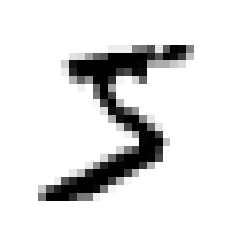

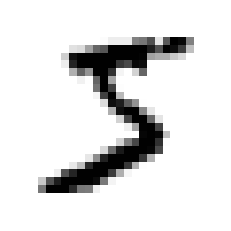

In [158]:
visual.plot_mnist_sample(X_train.iloc[0].values)
visual.plot_mnist_sample(X_train.iloc[60002].values)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

In [152]:
knn_clf = KNeighborsClassifier(n_neighbors=4,
                               weights='distance')  # Hyperparameters for the best estimator found in Exercise 1
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [159]:
y_test_pred = knn_clf.predict(X_test)

In [160]:
from sklearn.metrics import accuracy_score

In [161]:
accuracy_score(y_test, y_test_pred)

0.9743